In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv("car_evaluation.csv", header= None)

In [18]:
data.head(5)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


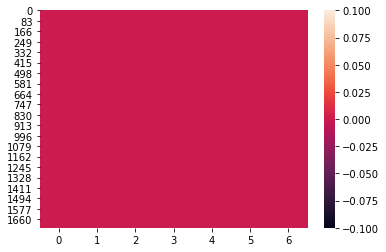

In [20]:
sns.heatmap(data.isnull())

In [21]:
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [22]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [23]:
X = data.iloc[:,:-1]

In [25]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [26]:
X = pd.get_dummies(X,drop_first=True)

In [27]:
X.head()

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1


In [29]:
data['buying'].value_counts()

med      432
high     432
low      432
vhigh    432
Name: buying, dtype: int64

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   buying_low      1728 non-null   uint8
 1   buying_med      1728 non-null   uint8
 2   buying_vhigh    1728 non-null   uint8
 3   maint_low       1728 non-null   uint8
 4   maint_med       1728 non-null   uint8
 5   maint_vhigh     1728 non-null   uint8
 6   doors_3         1728 non-null   uint8
 7   doors_4         1728 non-null   uint8
 8   doors_5more     1728 non-null   uint8
 9   persons_4       1728 non-null   uint8
 10  persons_more    1728 non-null   uint8
 11  lug_boot_med    1728 non-null   uint8
 12  lug_boot_small  1728 non-null   uint8
 13  safety_low      1728 non-null   uint8
 14  safety_med      1728 non-null   uint8
dtypes: uint8(15)
memory usage: 25.4 KB


In [33]:
data['persons'].value_counts()

2       576
more    576
4       576
Name: persons, dtype: int64

In [34]:
from sklearn import tree

In [35]:
y = data['class']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [37]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [39]:
y_pred = clf.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.884393063583815

In [42]:
clf.criterion

'gini'